In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Example data: all mistakes were made with low confidence, all correct predictions have high confidence
# default accuracy: 0.5
example_pred_labels = [(-1, 0.23), (-1, 0.23), (0, 0.23), (1, 0.23), (-1, 0.23), 
                       (0, 0.83), (0, 0.83), (1, 0.83), (-1, 0.83), (-1, 0.83)]
example_pred_labels_only = [-1, -1, 0, 1, -1, 0, 0, 1, -1, -1]
example_correct_labels = [0, 1, 1, -1, 0, 0, 0, 1, -1, -1]

#### 1.1 Adjusted Accuracy
low confidence mistakes slightly boosts the final 'accuracy' <br>
high confidence mistakes inflict extra penalty on the final 'accuracy' <br>
(the other way around for correct predictions)

In [3]:
def calculate_adjusted_accuracy(pred_labels, correct_labels, confidence_min=0):
    num_correct = 0
    for idx, pair in enumerate(pred_labels): 
        if pair[0] != correct_labels[idx]:
            num_correct += (0.5-pair[1])
        else:
            num_correct += 1 + (pair[1] - 0.5)
    return num_correct / len(correct_labels)

In [4]:
calculate_adjusted_accuracy(example_pred_labels, example_correct_labels)

0.8

#### 1.2 Alternative: multiple ROC plots
which takes probability into consideration. But we have to think about whether the confidence output represents actual probability.

https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a

#### 2 Confusion Matrix

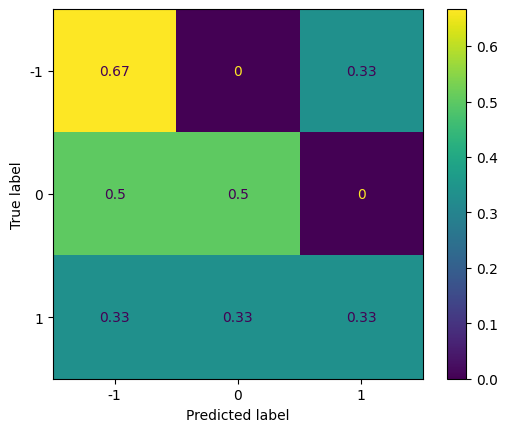

In [5]:
# normalize='true': row adds up to 1
# remove the normalize parameter: raw counts
ConfusionMatrixDisplay.from_predictions(example_correct_labels, example_pred_labels_only, normalize='true')